In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [2]:
df=pd.read_csv(r'Downloads/DS1_C9_S1_Practice_Income_Data.csv')
df

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Capital_Gain', 'Capital_Loss',
       'Hours_Per_Week', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [ ]:
#TASK1 DATA EXPLORATION


In [5]:
#TASK1_A
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_Per_Week  32561 non-null  int64 
 11  Native_Country  32561 non-null  object
 12  Income_Bracket  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [6]:
#TASK1_B : Identify categorical columns and display the number of labels
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['WorkClass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Gender', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_cols)}")
for col in categorical_cols:
    print("Label Counts:")
    print(df[col].value_counts())

Categorical Columns: ['WorkClass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Gender', 'Native_Country', 'Income_Bracket']
Label Counts:
WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Label Counts:
Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
Label Counts:
Marital_Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed            

In [ ]:
#TASK2-- MISSING VALUE

In [8]:
#TASK2_1
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [ ]:
#TASK3 -- DATA PREPROCESSNG
Transforming the data in a proper format is important to make it more suitable for analysis in the next step. Data scaling and selecting best features are also significant to avoid data biasing and keeping the most relevant variables from the whole dataset. For this, perform the following tasks:


In [28]:
#TASK3_1 a) Convert non-numeric labeled columns into categorical types.
df[col] = df[col].astype('category')
print(df.dtypes)


Age                  int64
WorkClass            int32
Fnlwgt               int64
Education            int32
Marital_Status       int32
Occupation           int32
Relationship         int32
Gender               int32
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country       int32
Income_Bracket    category
dtype: object


In [13]:
#TASK3_2:b) Use the Label Encoder technique to convert the categorical column into numerical type.¶
df[col].unique()
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder directly

label_encoder = LabelEncoder()
for col in categorical_cols:  # Use categorical_cols directly as it's a list of column names
    df[col] = label_encoder.fit_transform(df[col])


In [16]:
#TASK3_C
# c) Perform data scaling
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Data Scaling Completed.")



Data Scaling Completed.


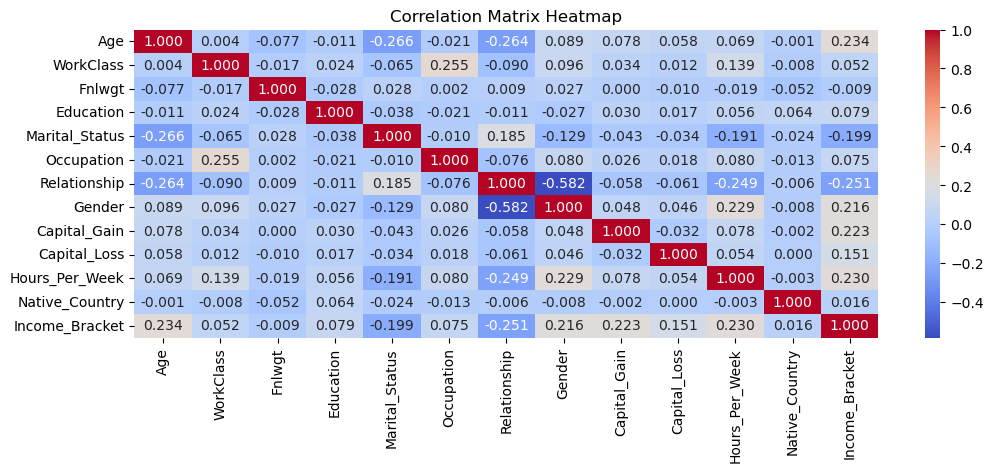

In [22]:
#TASK3_D Select the best features based on their correlation values.
import matplotlib.pyplot as plt
correlation_matrix = data_scaled.corr()
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Income_Bracket"]) > 0.5]
data_selected = data_scaled[high_corr_features]

In [23]:
important_features = correlation_matrix['Income_Bracket'][correlation_matrix['Income_Bracket'].abs() > 0.1].index
print("\nSelected important features:")
print(important_features)


Selected important features:
Index(['Age', 'Marital_Status', 'Relationship', 'Gender', 'Capital_Gain',
       'Capital_Loss', 'Hours_Per_Week', 'Income_Bracket'],
      dtype='object')


In [ ]:
#Task 4 (Data Splitting)
Splitting the whole dataset provides 'Train' dataset, which helps in building the machine learning model, and a 'Test' dataset, which helps in testing the performance of the model.

#a) Split the data into train set and test set into 70:30 ratio by row index.

In [25]:
# Task 4a: Split by row index
X = df.drop(columns=['Income_Bracket'])
y = df['Income_Bracket']

train_size = int(0.7 * len(df))  # Calculate 70% of the dataset
X_train_manual = X.iloc[:train_size] # First 70% for training
X_test_manual = X.iloc[train_size:] # Remaining 30% for testing
y_train_manual = y.iloc[:train_size]
y_test_manual = y.iloc[train_size:] 

print("Manual splitting completed.")
print(f"Training set size: {X_train_manual.shape[0]}")
print(f"Testing set size: {X_test_manual.shape[0]}")

Manual splitting completed.
Training set size: 22792
Testing set size: 9769


In [26]:
#b) Split the data into train set and test set into 70:30 ratio by train_test_split() built-in method.
# Assuming 'target_column' is the target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split data using train_test_split

print("\nTrain-Test Split completed.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")



Train-Test Split completed.
Training set size: 22792
Testing set size: 9769


In [ ]:
#Task 5 (Data Visualization)
Perform all feasible data visualization to present the data well.

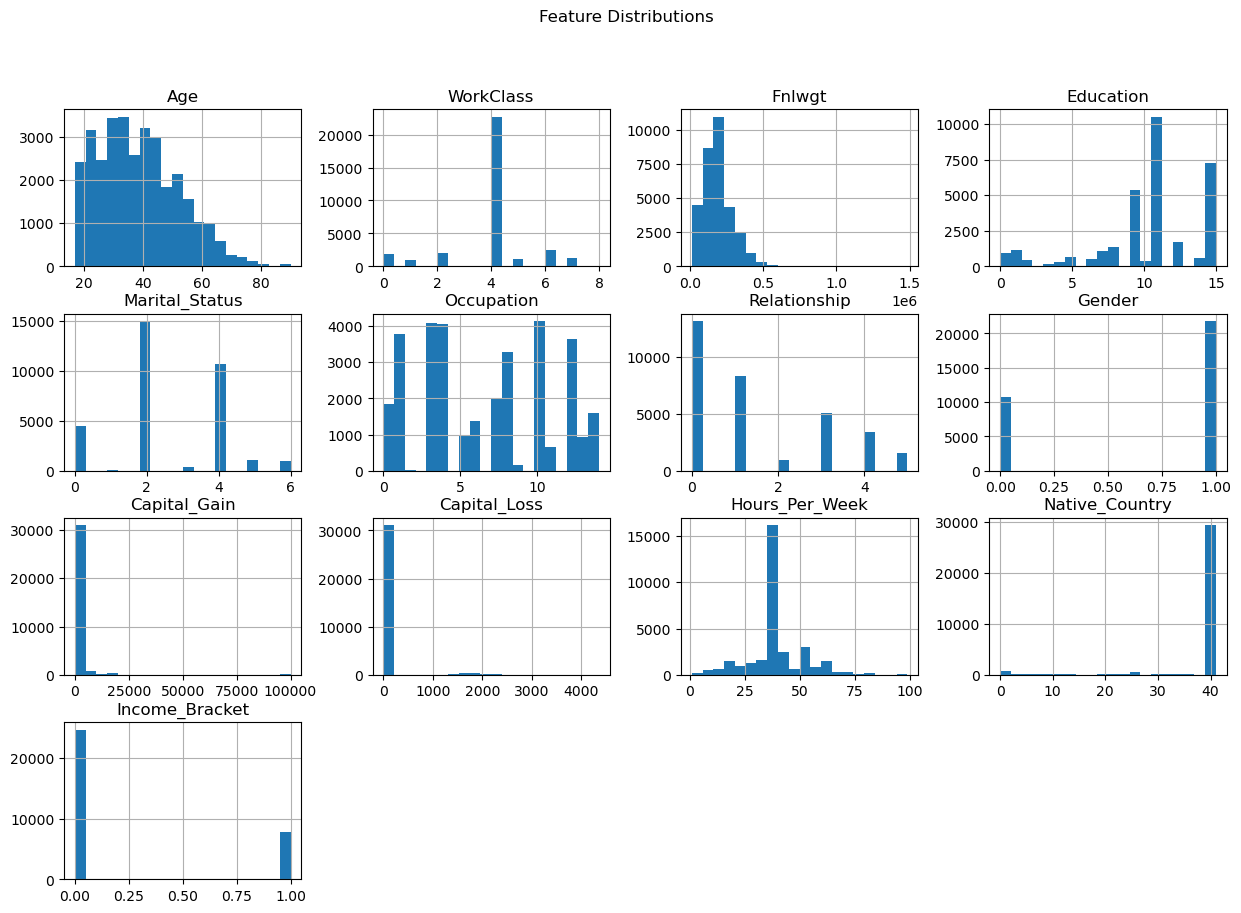

In [27]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()